In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import cumtrapz
from scipy.special import exp1
from scipy.special import expi
from scipy.stats.distributions import fisk

from statsmodels.distributions.empirical_distribution import ECDF

In [38]:
def SFP(n, mu, rho=1):
    # first inter-event time
    deltat = mu
    # list of inter-event times
    Deltat = [deltat]
    for i in range(1, n):
        # Poisson Process which Beta=deltat+mu/e
        deltat = -(deltat+(mu**rho)/np.e)
        deltat = deltat * np.log(np.random.rand())
        Deltat.append(deltat**(1/rho))
    return Deltat

In [39]:
def stationary(x, alpha):
    beta = 1.0
    aux = (beta ** 2) / alpha
    c = 1.0 / (aux * np.exp(aux) * exp1(aux))
    pdf = np.exp(-alpha / x) / (alpha * x)
    return c * pdf

In [40]:
x = np.linspace(0.1, 100, 1000)

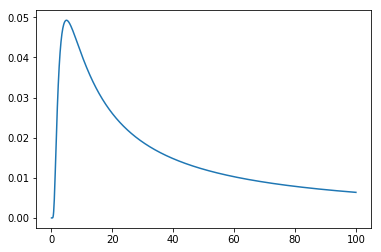

In [42]:
plt.plot(x, stationary(x, 5))

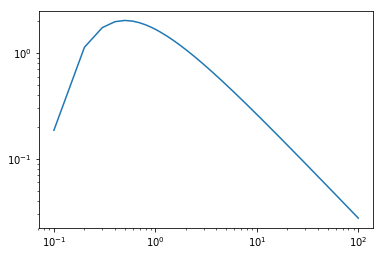

In [44]:
plt.loglog(x, stationary(x, 0.5))

In [45]:
ticks = SFP(1000, np.e)

(array([ 854.,   59.,   31.,   14.,    9.,    4.,    4.,    3.,    2.,
           1.,    3.,    2.,    0.,    1.,    1.,    0.,    1.,    2.,
           1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  5.95858472e-03,   1.23608812e+01,   2.47158039e+01,
          3.70707265e+01,   4.94256491e+01,   6.17805718e+01,
          7.41354944e+01,   8.64904171e+01,   9.88453397e+01,
          1.11200262e+02

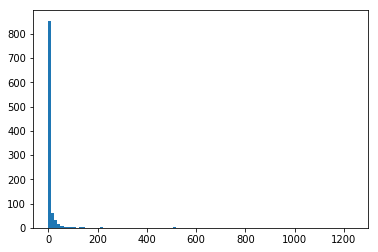

In [46]:
plt.hist(ticks, bins=100)

In [49]:
Fx = cumtrapz(stationary(x, .5), x, initial=0)
Fx

array([  0.        ,   0.06611772,   0.21003246,   0.39626838,
         0.5971964 ,   0.79924091,   0.99624656,   1.18560632,
         1.36640858,   1.53855581,   1.70233522,   1.85820446,
         2.00668317,   2.14829816,   2.28355643,   2.41293274,
         2.5368651 ,   2.65575415,   2.76996474,   2.87982837,
         2.98564607,   3.08769125,   3.18621244,   3.28143594,
         3.37356801,   3.46279709,   3.54929556,   3.63322147,
         3.71471997,   3.79392461,   3.87095853,   3.94593544,
         4.01896054,   4.09013131,   4.15953828,   4.22726558,
         4.29339159,   4.3579894 ,   4.42112726,   4.48286903,
         4.54327452,   4.6023998 ,   4.66029754,   4.71701726,
         4.77260555,   4.82710634,   4.88056106,   4.93300884,
         4.98448666,   5.03502953,   5.08467061,   5.13344132,
         5.18137149,   5.22848947,   5.27482217,   5.32039521,
         5.365233  ,   5.40935877,   5.45279469,   5.49556191,
         5.53768061,   5.57917011,   5.62004885,   5.66